# 1. Read JSON file

We use the Python library [Pandas](http://pandas.pydata.org) to read the dataset, which is given in [JSON](http://json.org) format:

In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json('data/challenge.json')
df.shape

(204428, 14)

In [3]:
df.head()

,branch_id,customer_code,group_code,is_churn,item_code,item_total_price,order_id,quantity,register_date,sales_channel,segment_code,seller_code,total_price,unit_price
0,0,143,0,0.0,854,292.91,21804,10,2017-11-10T00:00:00Z,0,0,190,1613.53,25.04
1,0,433,0,0.0,246,287.19,5486,20,2011-05-16T00:00:00Z,1,5,153,11163.69,12.33
2,0,486,0,0.0,1420,184.84,22662,12,2018-01-24T00:00:00Z,0,0,166,6432.12,12.80
3,0,107,0,0.0,1963,189.18,3956,18,2010-07-28T00:00:00Z,1,0,156,831.82,10.51
4,0,768,0,0.0,1786,66.87,4730,5,2010-12-17T00:00:00Z,1,0,218,1736.48,11.82


In [4]:
df.nunique()

branch_id               1
customer_code         838
group_code              4
is_churn                2
item_code            2981
item_total_price    55336
order_id            24618
quantity              290
register_date        3121
sales_channel         106
segment_code            8
seller_code           290
total_price         22713
unit_price          19828
dtype: int64

The dataset contains **24618** orders from **838** clients.

# 2. Costumer Churn Analysis

In [5]:
columns = ['customer_code', 'is_churn', 'total_price', 'order_id']

dic = {'is_churn': 'last',
       'total_price': 'sum',
       'order_id': 'count'}

df2 = df[columns]\
    .groupby('customer_code')\
    .agg(dic)\
    .dropna()\
    .rename(columns={'order_id': 'norders'})

df2.head()

,is_churn,total_price,norders
customer_code,,,
0,0.0,785677.26,179
1,0.0,1083620.64,471
2,0.0,841537.44,307
3,0.0,5102786.19,635
4,0.0,1076850.86,301


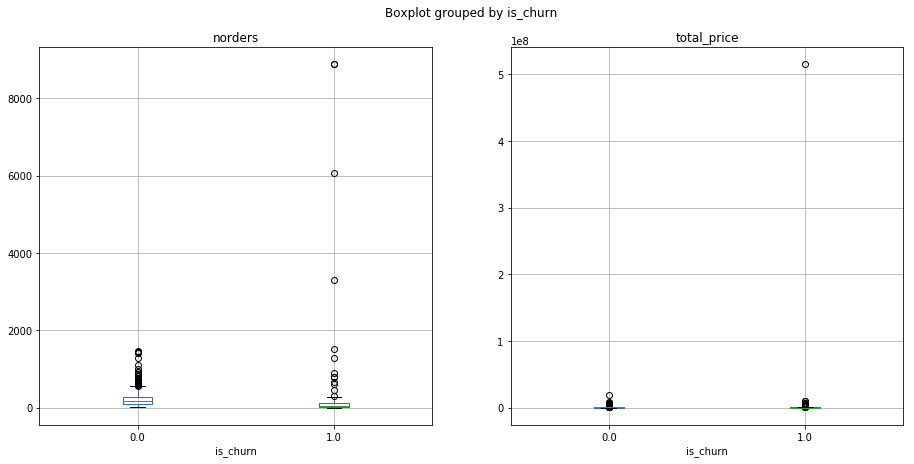

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
df2.boxplot(column='norders', by='is_churn', ax=axes[0])
df2.boxplot(column='total_price', by='is_churn', ax=axes[1]);

In [7]:
df2[df2.is_churn==0.0].describe()

,is_churn,total_price,norders
count,737.0,7.370000e+02,737.000000
mean,0.0,6.695788e+05,222.251018
std,0.0,1.126446e+06,191.655611
min,0.0,7.427760e+03,9.000000
25%,0.0,1.808718e+05,96.000000
50%,0.0,3.586477e+05,171.000000
75%,0.0,7.141190e+05,288.000000
max,0.0,1.863839e+07,1457.000000


In [8]:
df2[df2.is_churn==1.0].describe()

,is_churn,total_price,norders
count,81.0,8.100000e+01,81.000000
mean,1.0,7.307173e+06,477.950617
std,0.0,5.721060e+07,1560.159775
min,1.0,6.212100e+03,3.000000
25%,1.0,6.186325e+04,28.000000
50%,1.0,1.462234e+05,57.000000
75%,1.0,4.917936e+05,136.000000
max,1.0,5.155251e+08,8884.000000


# 3. Time Series Analysis

In [9]:
ts = pd.to_datetime(df.register_date).value_counts().resample('M').sum()

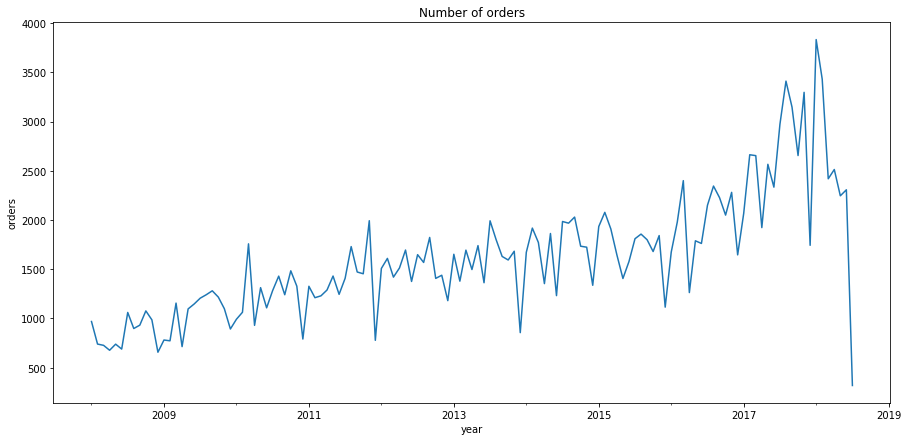

In [10]:
ts.plot(figsize=(15, 7))
plt.xlabel("year")
plt.ylabel("orders")
plt.title("Number of orders");